In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
fnamesA = glob.glob(fdir+'Daisy/*/*_03_*D*rfireduced.npz')
fnamesA.sort()
print len(fnamesA)

24


In [5]:
fdiode, pdiode = np.load('../calibrations/lownoise_calibration_3C295_03_D.npy')

In [6]:
nz = np.load(fnamesA[5])
mask = nz['valid']
gain = pdiode / ( nz['xxon'] - nz['xxoff'])
ratio = nz['xxoff'] / nz['xxon']
calibd = (nz['xxoff'] * gain)
freqs = nz['freqs']

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [7]:
mask3 = freqs > 7.6e9
mask = mask & ~mask3
calibd[:, ~mask] = np.nan
ratio[:, ~mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


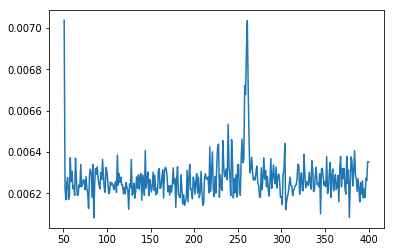

In [8]:
plot(ratio.std(0) / ratio.mean(0))

/usr/lib64/python2.7/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


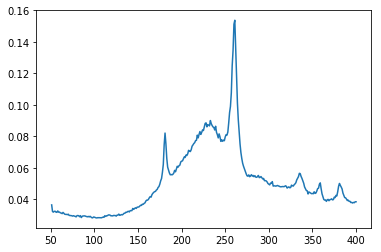

In [9]:
plot(np.nanstd(calibd, 0) / np.nanmean(calibd, 0))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


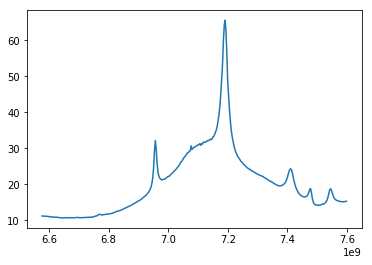

In [33]:
plot(freqs, np.nanmean(calibd, 0))

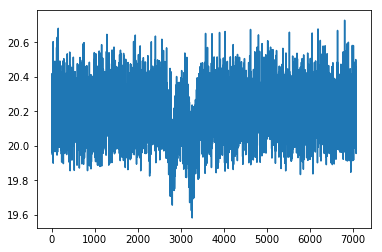

In [34]:
plot(np.nanmean(calibd, 1))

In [35]:
allhist = []
bins = np.linspace(-.1, 0.1, 50)
for k in range(512):
    try:
        allhist.append(np.histogram(calibd[:,k] / np.mean(calibd[:,k]) - 1., bins=bins)[0])
    except ValueError:
        pass
allhist = np.array(allhist)

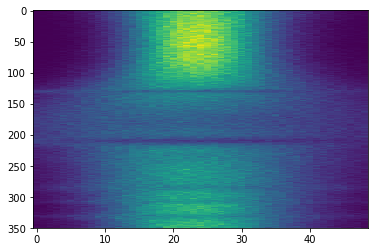

In [36]:
imshow(allhist, aspect='auto')

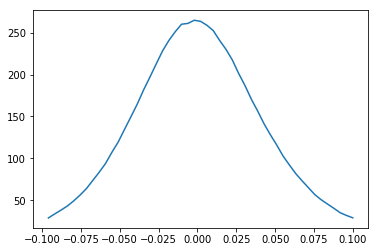

In [37]:
plot(bins[1:], allhist.mean(0))

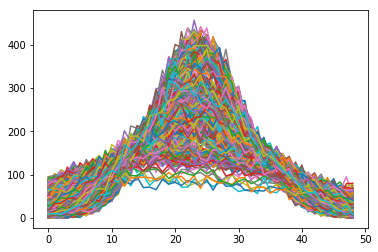

In [38]:
plot(allhist.T);

In [39]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

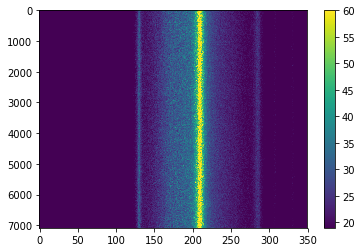

In [42]:
imshow(calibd[:, mask], aspect='auto')
colorbar()
clim(19, 60)

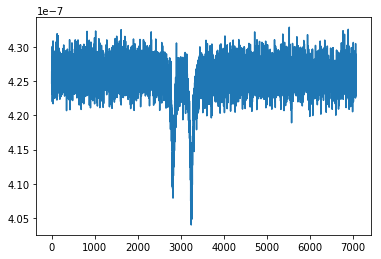

In [43]:
plot(np.nanmean(gain[:, mask], 1))

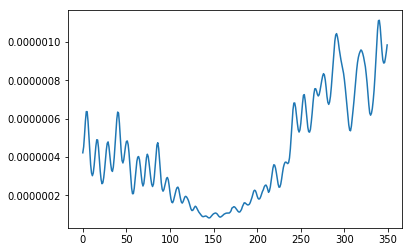

In [44]:
plot(np.nanmean(gain[:, mask], 0))